In [1]:
#include <iostream>
#include <string>
#include <stdio.h>

%jsroot on

In [20]:
TFile *file = TFile::Open("RootFiles/DataTest.root"); 

In [21]:
TTree *tree = (TTree*) file->Get("Signal");
TTree *bree = (TTree*) file->Get("Background");

In [25]:
Float_t fourm;
Float_t weight;
Float_t fourmb;
Float_t weightb;
tree->SetBranchAddress("FourLepSystemM", &fourm);
tree->SetBranchAddress("Weight", &weight);
bree->SetBranchAddress("FourLepSystemM", &fourmb);
bree->SetBranchAddress("Weight", &weightb);

In [50]:
TCanvas *canvas = new TCanvas("Canvas","a first way to plot a variable",800,600);
TH1F *hist = new TH1F("variable","Example plot: Number of leptons; Number of leptons ; Events ",200,0,500);
TH1F *hist1 = new TH1F("variable","Example plot: Number of leptons; Number of leptons ; Events ",200,0,500);

int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();
for (i = 0; i < nentries; i++)
{
    
    nbytes = tree->GetEntry(i);
    hist->Fill(fourm);
}

int nentriesb, nbytesb, ib;
nentriesb = (Int_t)bree->GetEntries();
for (ib = 0; ib < nentriesb; ib++)
{
    nbytesb = bree->GetEntry(ib);
    hist1->Fill(fourmb);
}


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Warning in <TFile::Append>: Replacing existing TH1: variable (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: variable (Potential memory leak).


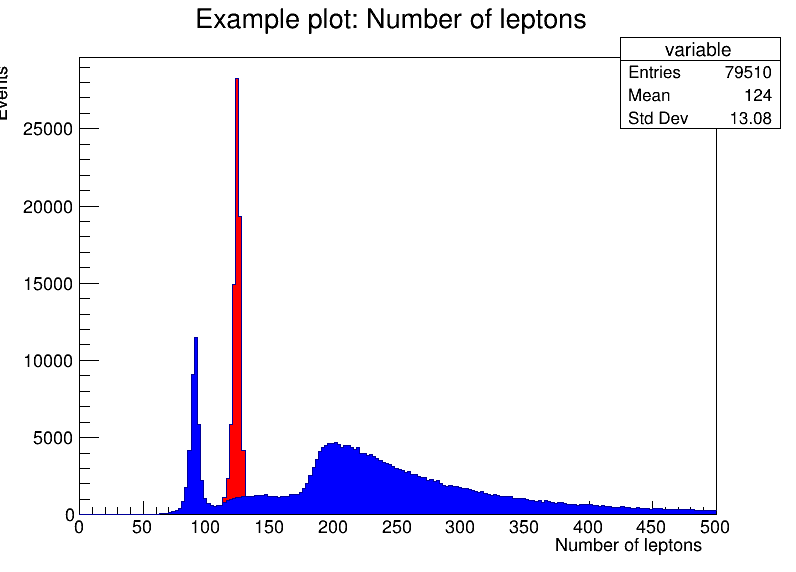

In [51]:
hist->SetFillColor(kRed);
hist1->SetFillColor(kBlue);
hist->Draw();
hist1->Draw("same");
canvas->Draw();